# Birds Classification

---

## Problem Description

- To classify an Image of a Bird to any one of the 510 species.
- This problem is a Multi-class Image Classification Problem.

## Dataset Description

- The dataset has 510 classes. 
- There are 81,950 training images, 2,550 test images and 2,550 validation images.

## Models Tried

- EfficientNetB2
- Vision Transformer

## Evaluation Metrics Used

- Accuracy
- Precision
- Recall
- F1-score

## 1. Importing the required Libraries

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import shutil
import random

In [3]:
# mounting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Getting the data

In [8]:
shutil.copy2("/content/drive/MyDrive/Colab Notebooks/kaggle.json", "/content")

'/content/kaggle.json'

In [9]:
!pip install torchinfo
from torchinfo import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# getting the data from kaggle
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download gpiosenka/100-bird-species

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 1.88G/1.89G [00:09<00:00, 211MB/s]
100% 1.89G/1.89G [00:09<00:00, 225MB/s]


In [11]:
# extracting the dataset
from zipfile import ZipFile

with ZipFile("/content/100-bird-species.zip", "r") as zipref:
  zipref.extractall("/content/Dataset")

In [12]:
# setting up train, validation and test directories
train_dir = "/content/Dataset/train"
valid_dir = "/content/Dataset/valid"
test_dir = "/content/Dataset/test"

In [13]:
# setting up a function to know how many images and classes are available
def walk_through(path: str):
    """
    Getting the number of images in each classes.
    """
    for dirpath, dirname, filename in os.walk(path):
        print(f"Directory: {dirpath}")
        print(f"No. of Sub-directories: {len(dirname)}")
        print(f"No. of Files: {len(filename)}\n")
    

In [14]:
walk_through(train_dir)

Directory: /content/Dataset/train
No. of Sub-directories: 510
No. of Files: 0

Directory: /content/Dataset/train/NORTHERN JACANA
No. of Sub-directories: 0
No. of Files: 156

Directory: /content/Dataset/train/NICOBAR PIGEON
No. of Sub-directories: 0
No. of Files: 154

Directory: /content/Dataset/train/GOLDEN BOWER BIRD
No. of Sub-directories: 0
No. of Files: 140

Directory: /content/Dataset/train/AUSTRALASIAN FIGBIRD
No. of Sub-directories: 0
No. of Files: 190

Directory: /content/Dataset/train/LUCIFER HUMMINGBIRD
No. of Sub-directories: 0
No. of Files: 168

Directory: /content/Dataset/train/COMMON HOUSE MARTIN
No. of Sub-directories: 0
No. of Files: 157

Directory: /content/Dataset/train/RUBY THROATED HUMMINGBIRD
No. of Sub-directories: 0
No. of Files: 135

Directory: /content/Dataset/train/PALM NUT VULTURE
No. of Sub-directories: 0
No. of Files: 192

Directory: /content/Dataset/train/AMERICAN GOLDFINCH
No. of Sub-directories: 0
No. of Files: 133

Directory: /content/Dataset/train/COCK

In [15]:
walk_through(valid_dir)

Directory: /content/Dataset/valid
No. of Sub-directories: 510
No. of Files: 0

Directory: /content/Dataset/valid/NORTHERN JACANA
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/NICOBAR PIGEON
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/GOLDEN BOWER BIRD
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/AUSTRALASIAN FIGBIRD
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/LUCIFER HUMMINGBIRD
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/COMMON HOUSE MARTIN
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/RUBY THROATED HUMMINGBIRD
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/PALM NUT VULTURE
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/AMERICAN GOLDFINCH
No. of Sub-directories: 0
No. of Files: 5

Directory: /content/Dataset/valid/COCK OF THE  ROCK
No. 

In [16]:
# creating a list of class_names
class_names = []
for dir_name in os.listdir(train_dir):
    class_names.append(dir_name)

class_names.sort()
class_names

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE BREASTED PITTA',
 'AZURE JAY',
 'AZURE TANAGE

In [17]:
len(class_names)

510

In [18]:
train_dir, valid_dir, test_dir

('/content/Dataset/train', '/content/Dataset/valid', '/content/Dataset/test')

In [19]:
test_dir.split("/")[-1]

'test'

In [20]:
train_dir, valid_dir, test_dir

('/content/Dataset/train', '/content/Dataset/valid', '/content/Dataset/test')

In [23]:
def get_total_images(path):
  """
  Returns the total number of images of all classes in the directory
  """
  total_images = 0
  for classes in os.listdir(path):
      for imgs in os.listdir(path + "/" + classes):
          total_images += 1
  return total_images

In [24]:
get_total_images(train_dir)

81950

In [25]:
get_total_images(valid_dir)

2550

In [26]:
get_total_images(test_dir)

2550

In [27]:
len(class_names)

510

### 1.1. Viewing a Random Image

In [28]:
train_dir

'/content/Dataset/train'

In [36]:
def random_img_plot(img_path: str, num_images: int):
    """
    Randomly plot an image in the given class.
    """
    class_name = random.sample(class_names, k=num_images)

    actual_img_path_list = [img_path + "/" + cls for cls in class_name]
    img_path_list = []
    for img_path in actual_img_path_list:
      for dirpath, _ , images in os.walk(img_path):
        img_path_list.append(dirpath + "/" + random.sample(images, k=1)[0])

    plt.figure(figsize=(30, 10))
    for ind, img in enumerate(img_path_list):
        plt.subplot(1, num_images, ind+1)
        plt.imshow(plt.imread(img))
        plt.axis(False)
        plt.title(class_name[ind]+f"\nSize: {plt.imread(img).shape}", fontsize=18)

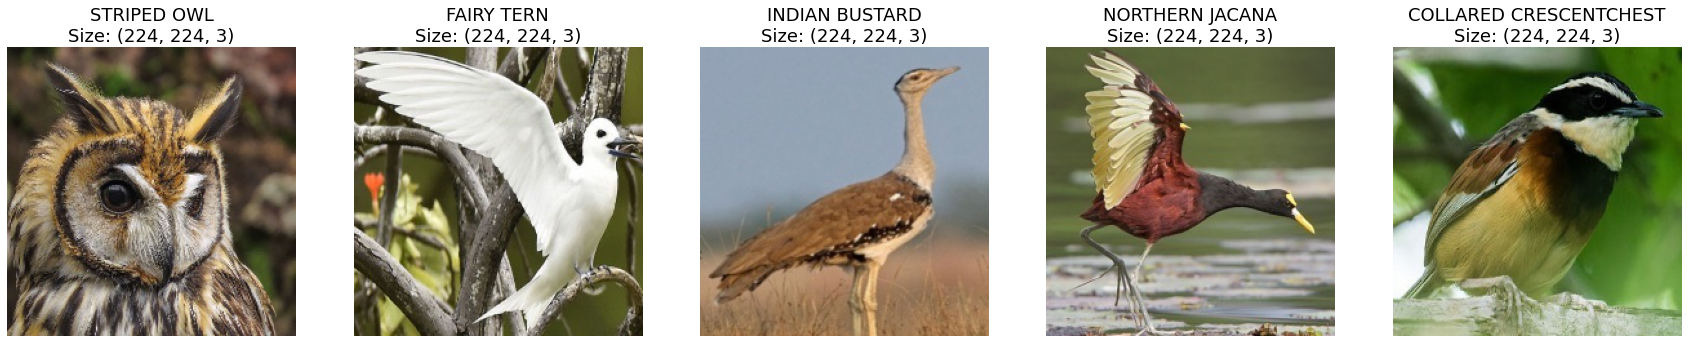

In [37]:
random_img_plot(train_dir, num_images=5)

## 2. Creating Datasets and DataLoaders Function

- I'm taking only 20% of the train and validation data. Because it will take too long to train and also entire train data cannot be fit into GPU Memory.

In [38]:
train_dir, valid_dir, test_dir

('/content/Dataset/train', '/content/Dataset/valid', '/content/Dataset/test')

In [39]:
len(class_names)

510

In [40]:
walk_through(train_dir)

Directory: /content/Dataset/train
No. of Sub-directories: 510
No. of Files: 0

Directory: /content/Dataset/train/NORTHERN JACANA
No. of Sub-directories: 0
No. of Files: 156

Directory: /content/Dataset/train/NICOBAR PIGEON
No. of Sub-directories: 0
No. of Files: 154

Directory: /content/Dataset/train/GOLDEN BOWER BIRD
No. of Sub-directories: 0
No. of Files: 140

Directory: /content/Dataset/train/AUSTRALASIAN FIGBIRD
No. of Sub-directories: 0
No. of Files: 190

Directory: /content/Dataset/train/LUCIFER HUMMINGBIRD
No. of Sub-directories: 0
No. of Files: 168

Directory: /content/Dataset/train/COMMON HOUSE MARTIN
No. of Sub-directories: 0
No. of Files: 157

Directory: /content/Dataset/train/RUBY THROATED HUMMINGBIRD
No. of Sub-directories: 0
No. of Files: 135

Directory: /content/Dataset/train/PALM NUT VULTURE
No. of Sub-directories: 0
No. of Files: 192

Directory: /content/Dataset/train/AMERICAN GOLDFINCH
No. of Sub-directories: 0
No. of Files: 133

Directory: /content/Dataset/train/COCK

In [41]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import datasets

def create_dataloader(path: str, 
                      split=False,
                      split_size: int = 0.2,
                      transform: torchvision.transforms = None,
                      batch_size: int = 32, 
                      shuffle: bool = False,
                      num_workers = 1,
                      return_classes: bool = False):
    """
    Creates a dataset and convert it into a DataLoader
    """

    if transform is None:
        transform = transforms.Compose([
            transforms.Resize(size=(224, 224)),
            transforms.ToTensor()
        ])

    dataset = datasets.ImageFolder(path,
                                   transform=transform,
                                   target_transform=None,
                                   )
    
    classes = dataset.classes

    # Making a split
    if split:
      length = int(len(dataset)*split_size)
      rem_length = len(dataset) - length
      dataset, _ = torch.utils.data.random_split(dataset=dataset, 
                                                 lengths=[length, rem_length], 
                                                 generator=torch.manual_seed(42))

    dataloader = DataLoader(dataset=dataset,
                            batch_size=batch_size,
                            shuffle=shuffle,
                            num_workers=num_workers,
                            pin_memory=True
                            )
    
    if return_classes:
        return dataloader, classes
    return dataloader

## 4. Creating Models

In [42]:
# Setting up Device Agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 4.1. Creating a Train Function

In [45]:
from torchmetrics import Accuracy

def accuracy_fn(y_pred, y):
  """
  Calculates the accuracy score for the given actual and predicted values
  """
  acc_fn = Accuracy(task="multiclass", num_classes=len(class_names), top_k=1).to(device)
  return acc_fn(y_pred.argmax(dim=1), y)

In [46]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn = accuracy_fn,
               device=device):
    """
    Trains the model with given Dataloader
    """    
    # setting up total train loss and accuracy
    train_loss = 0
    train_acc = 0

    # putting the model to train mode
    model.train()

    # training the model
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # forward pass
        pred_logits = model(X)

        # calculate loss
        loss = loss_fn(pred_logits, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        acc = acc_fn(pred_logits, y)
        train_acc += acc.item()

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

In [47]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn = accuracy_fn,
               device=device):
    """
    Evaluates the model on the given dataloader
    """

    valid_loss, valid_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            pred_logits = model(X)

            loss = loss_fn(pred_logits, y)
            valid_loss += loss.item()

            acc = acc_fn(pred_logits, y)
            valid_acc += acc.item()
    valid_loss = valid_loss / len(dataloader)
    valid_acc = valid_acc / len(dataloader)

    return valid_loss, valid_acc

In [48]:
from tqdm.notebook import tqdm

def train(model: torch.nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               valid_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               epochs: int = 5,
               device=device):
    """
    Training Loop for training and evaluating a model
    """

    # create a results dictionary
    results = {
        "train_loss": [],
        "train_acc": [],
        "valid_loss": [],
        "valid_acc": []
    }

    for epoch in tqdm(range(epochs)):

        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        
        valid_loss, valid_acc = test_step(model=model,
                                        dataloader=valid_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        
        print(f"Epoch: {epoch+1} | Train Loss: {train_loss} | Train Accuracy: {train_acc} | Validation Loss: {valid_loss} | Validation Accuracy: {valid_acc}")

        # updating results
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["valid_loss"].append(valid_loss)
        results["valid_acc"].append(valid_acc)

    return results

In [49]:
def plot_loss_curves(model_results):
  """
  Plots the model's loss and accuracy curves
  """
  train_loss = model_results["train_loss"]
  train_acc = model_results["train_acc"]

  valid_loss = model_results["valid_loss"]
  valid_acc = model_results["valid_acc"]

  epochs = range(len(train_loss))

  plt.figure(figsize=(15, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_loss, label="Train Loss")
  plt.plot(epochs, valid_loss, label="Validation Loss")
  plt.title("Loss")
  plt.legend()
  
  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_acc, label="Train Accuracy")
  plt.plot(epochs, valid_acc, label="Validation Accuracy")
  plt.title("Accuracy")

  plt.legend()
  plt.suptitle("Loss and Accuracy Curves", fontsize=26);

In [50]:
def make_predictions_on_test_data(model: torch.nn.Module,
                                  test_dataloader: torch.utils.data.DataLoader):
  """
  Makes prediction on test dataset
  """
  test_score = 0
  
  model.eval()
  with torch.inference_mode():
    test_acc = 0
    for batch, (X, y) in enumerate(test_dataloader):
      X, y = X.to(device), y.to(device)

      pred_logits = model(X)
      preds = torch.softmax(pred_logits, dim=1)
      acc = accuracy_fn(y_pred=preds, y=y)    
      test_acc += acc

    test_acc = test_acc / len(test_dataloader)
    return test_acc.item()

### 4.2. Model 1: EfficientNetB2

In [51]:
from torch import nn

In [52]:
len(class_names)

510

In [53]:
import torchvision

effnet_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

effnetb2_model = torchvision.models.efficientnet_b2(weights=effnet_weights).to(device)
effnetb2_model

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-bcdf34b7.pth


  0%|          | 0.00/35.2M [00:00<?, ?B/s]

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [54]:
effnet_weights.transforms()

ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [55]:
eff_net_transforms_with_data_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    effnet_weights.transforms()
])

In [56]:
# creating train and validation dataloaders with effnet transforms
effnetb2_train_dataloader, class_names = create_dataloader(
    path=train_dir,
    split=True,
    transform=eff_net_transforms_with_data_augmentation,
    shuffle=True,
    return_classes=True
)

effnetb2_valid_dataloader = create_dataloader(
    path=valid_dir,
    split=True,
    transform=effnet_weights.transforms(),
    shuffle=False
)

effnetb2_test_dataloader = create_dataloader(
    path=test_dir,
    transform=effnet_weights.transforms(),
    shuffle=False
)

effnetb2_train_dataloader, effnetb2_valid_dataloader, effnetb2_test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f34594466a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3459412760>)

In [57]:
len(effnetb2_train_dataloader), len(effnetb2_valid_dataloader), len(effnetb2_test_dataloader)

(513, 16, 80)

In [58]:
# freezing the layers
for i, param in enumerate(effnetb2_model.features.parameters()):
  param.requires_grad = False
  print(f"Param: {i} -> Trainable: {param.requires_grad}")

Param: 0 -> Trainable: False
Param: 1 -> Trainable: False
Param: 2 -> Trainable: False
Param: 3 -> Trainable: False
Param: 4 -> Trainable: False
Param: 5 -> Trainable: False
Param: 6 -> Trainable: False
Param: 7 -> Trainable: False
Param: 8 -> Trainable: False
Param: 9 -> Trainable: False
Param: 10 -> Trainable: False
Param: 11 -> Trainable: False
Param: 12 -> Trainable: False
Param: 13 -> Trainable: False
Param: 14 -> Trainable: False
Param: 15 -> Trainable: False
Param: 16 -> Trainable: False
Param: 17 -> Trainable: False
Param: 18 -> Trainable: False
Param: 19 -> Trainable: False
Param: 20 -> Trainable: False
Param: 21 -> Trainable: False
Param: 22 -> Trainable: False
Param: 23 -> Trainable: False
Param: 24 -> Trainable: False
Param: 25 -> Trainable: False
Param: 26 -> Trainable: False
Param: 27 -> Trainable: False
Param: 28 -> Trainable: False
Param: 29 -> Trainable: False
Param: 30 -> Trainable: False
Param: 31 -> Trainable: False
Param: 32 -> Trainable: False
Param: 33 -> Trainab

In [59]:
effnetb2_model.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)

In [60]:
effnetb2_model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1408, out_features=len(class_names))
).to(device)
effnetb2_model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1408, out_features=510, bias=True)
)

In [61]:
input_shape = next(iter(effnetb2_train_dataloader))[0].shape
input_shape

torch.Size([32, 3, 288, 288])

In [62]:
summary(model=effnetb2_model,
        input_size=(32, 3, 288, 288),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 288, 288]    [32, 510]            --                   Partial
├─Sequential (features)                                      [32, 3, 288, 288]    [32, 1408, 9, 9]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 288, 288]    [32, 32, 144, 144]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 288, 288]    [32, 32, 144, 144]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 144, 144]   [32, 32, 144, 144]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 144, 144]   [32, 32, 144, 144]   --                   --
│    └─Sequential (1)                                        [32, 32, 144, 144]   [32, 

In [63]:
# creating loss function and optimizer for effnet model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=effnetb2_model.parameters(), lr=0.001)

In [65]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

effnetb2_results = train(
    model=effnetb2_model,
    train_dataloader=effnetb2_train_dataloader,
    valid_dataloader=effnetb2_valid_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=5,
    device=device
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 3.9813475845850004 | Train Accuracy: 0.38015756986991706 | Validation Loss: 1.8110133707523346 | Validation Accuracy: 0.7470052093267441
Epoch: 2 | Train Loss: 1.7062933118487427 | Train Accuracy: 0.7245167316632893 | Validation Loss: 1.0063433088362217 | Validation Accuracy: 0.8492187485098839
Epoch: 3 | Train Loss: 1.1750548290230378 | Train Accuracy: 0.7953216374269005 | Validation Loss: 0.7503310739994049 | Validation Accuracy: 0.849088542163372
Epoch: 4 | Train Loss: 0.9373520851483819 | Train Accuracy: 0.8301859974396392 | Validation Loss: 0.6347017623484135 | Validation Accuracy: 0.876432292163372
Epoch: 5 | Train Loss: 0.7954635221591005 | Train Accuracy: 0.8486029889151366 | Validation Loss: 0.5827932376414537 | Validation Accuracy: 0.874739583581686


In [66]:
effnetb2_results

{'train_loss': [3.9813475845850004,
  1.7062933118487427,
  1.1750548290230378,
  0.9373520851483819,
  0.7954635221591005],
 'train_acc': [0.38015756986991706,
  0.7245167316632893,
  0.7953216374269005,
  0.8301859974396392,
  0.8486029889151366],
 'valid_loss': [1.8110133707523346,
  1.0063433088362217,
  0.7503310739994049,
  0.6347017623484135,
  0.5827932376414537],
 'valid_acc': [0.7470052093267441,
  0.8492187485098839,
  0.849088542163372,
  0.876432292163372,
  0.874739583581686]}

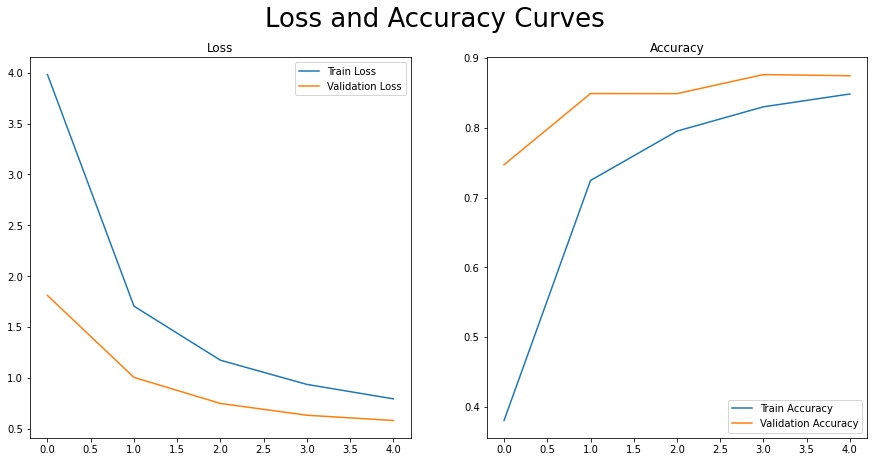

In [67]:
plot_loss_curves(effnetb2_results)

In [68]:
# making prediction on test data
effnetb2_test_results = make_predictions_on_test_data(model=effnetb2_model, 
                                                            test_dataloader=effnetb2_test_dataloader)
effnetb2_test_results

0.9059304594993591

In [69]:
# Overall effnetb2_results
effnetb2_scores = {
    "train_loss": effnetb2_results["train_loss"][-1],
    "train_acc": effnetb2_results["train_acc"][-1],

    "valid_loss": effnetb2_results["valid_loss"][-1],
    "valid_acc": effnetb2_results["valid_acc"][-1],

    "test_acc": effnetb2_test_results
}
effnetb2_scores

{'train_loss': 0.7954635221591005,
 'train_acc': 0.8486029889151366,
 'valid_loss': 0.5827932376414537,
 'valid_acc': 0.874739583581686,
 'test_acc': 0.9059304594993591}

### 4.3. Model 2: Vision Transformer

In [70]:
vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

vit_b16_model = torchvision.models.vit_b_16(weights=vit_weights)
vit_b16_model

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [71]:
vit_weights.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [72]:
vit_transforms_with_data_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    vit_weights.transforms()
])

In [73]:
# creating train and test dataloaders with vit transforms
vit_b16_train_dataloader, class_names = create_dataloader(
    path=train_dir,
    split=True,
    transform=vit_transforms_with_data_augmentation,
    shuffle=True,
    return_classes=True
)

vit_b16_valid_dataloader = create_dataloader(
    path=valid_dir,
    split=True,
    transform=vit_weights.transforms(),
    shuffle=False
)

vit_b16_test_dataloader = create_dataloader(
    path=test_dir,
    transform=vit_weights.transforms(),
    shuffle=False
)

vit_b16_train_dataloader, vit_b16_valid_dataloader, vit_b16_test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f3459a2ef40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f34599c1880>)

In [74]:
len(vit_b16_train_dataloader), len(vit_b16_valid_dataloader), len(vit_b16_test_dataloader)

(513, 16, 80)

In [75]:
# freezing the layers
for i, param in enumerate(vit_b16_model.parameters()):
  param.requires_grad = False
  print(f"Layer: {i} -> Trainable: {param.requires_grad}")

Layer: 0 -> Trainable: False
Layer: 1 -> Trainable: False
Layer: 2 -> Trainable: False
Layer: 3 -> Trainable: False
Layer: 4 -> Trainable: False
Layer: 5 -> Trainable: False
Layer: 6 -> Trainable: False
Layer: 7 -> Trainable: False
Layer: 8 -> Trainable: False
Layer: 9 -> Trainable: False
Layer: 10 -> Trainable: False
Layer: 11 -> Trainable: False
Layer: 12 -> Trainable: False
Layer: 13 -> Trainable: False
Layer: 14 -> Trainable: False
Layer: 15 -> Trainable: False
Layer: 16 -> Trainable: False
Layer: 17 -> Trainable: False
Layer: 18 -> Trainable: False
Layer: 19 -> Trainable: False
Layer: 20 -> Trainable: False
Layer: 21 -> Trainable: False
Layer: 22 -> Trainable: False
Layer: 23 -> Trainable: False
Layer: 24 -> Trainable: False
Layer: 25 -> Trainable: False
Layer: 26 -> Trainable: False
Layer: 27 -> Trainable: False
Layer: 28 -> Trainable: False
Layer: 29 -> Trainable: False
Layer: 30 -> Trainable: False
Layer: 31 -> Trainable: False
Layer: 32 -> Trainable: False
Layer: 33 -> Trainab

In [76]:
vit_b16_model.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [77]:
vit_b16_model.heads = nn.Sequential(
    nn.Linear(in_features=768, out_features=len(class_names))
)
vit_b16_model.heads

Sequential(
  (0): Linear(in_features=768, out_features=510, bias=True)
)

In [78]:
next(iter(vit_b16_train_dataloader))[0].shape

torch.Size([32, 3, 224, 224])

In [79]:
summary(model=vit_b16_model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 510]            768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [80]:
# creating loss function and optimizer for ViT model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=vit_b16_model.parameters(), lr=0.001)

In [81]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

vit_b16_results = train(
    model=vit_b16_model,
    train_dataloader=vit_b16_train_dataloader,
    valid_dataloader=vit_b16_valid_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=5,
    device=device
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 3.0593810622919837 | Train Accuracy: 0.43735786226757783 | Validation Loss: 1.276724748313427 | Validation Accuracy: 0.7450520843267441
Epoch: 2 | Train Loss: 1.2514098969816465 | Train Accuracy: 0.7483958739053901 | Validation Loss: 0.746806975454092 | Validation Accuracy: 0.8606770820915699
Epoch: 3 | Train Loss: 0.8853233237596515 | Train Accuracy: 0.8268559128917449 | Validation Loss: 0.583453020080924 | Validation Accuracy: 0.896223958581686
Epoch: 4 | Train Loss: 0.7077997459596128 | Train Accuracy: 0.8601770629892107 | Validation Loss: 0.47961644269526005 | Validation Accuracy: 0.905989583581686
Epoch: 5 | Train Loss: 0.6020409409501399 | Train Accuracy: 0.8826754385964912 | Validation Loss: 0.44780644960701466 | Validation Accuracy: 0.8980468735098839


In [82]:
vit_b16_results

{'train_loss': [3.0593810622919837,
  1.2514098969816465,
  0.8853233237596515,
  0.7077997459596128,
  0.6020409409501399],
 'train_acc': [0.43735786226757783,
  0.7483958739053901,
  0.8268559128917449,
  0.8601770629892107,
  0.8826754385964912],
 'valid_loss': [1.276724748313427,
  0.746806975454092,
  0.583453020080924,
  0.47961644269526005,
  0.44780644960701466],
 'valid_acc': [0.7450520843267441,
  0.8606770820915699,
  0.896223958581686,
  0.905989583581686,
  0.8980468735098839]}

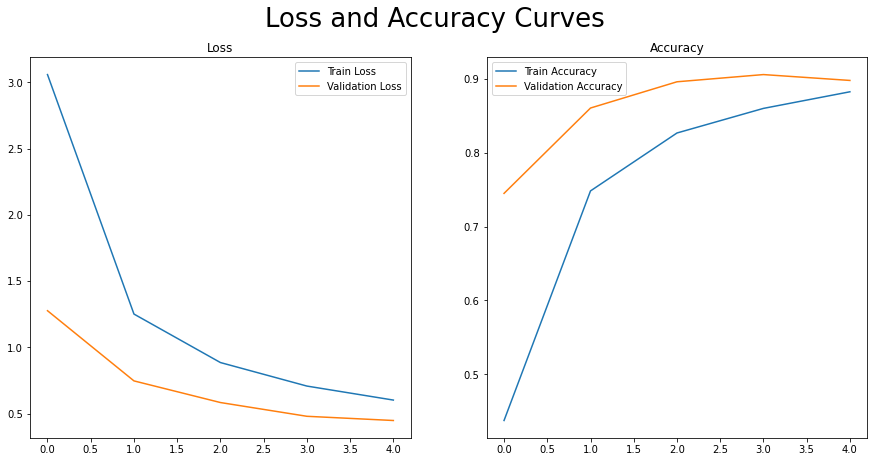

In [83]:
plot_loss_curves(vit_b16_results)

In [84]:
# making prediction on test data
vit_b16_test_results = make_predictions_on_test_data(model=vit_b16_model, 
                                                            test_dataloader=vit_b16_test_dataloader)
vit_b16_test_results

0.9201704859733582

In [85]:
# Overall vit_b16_results
vit_b16_scores = {
    "train_loss": vit_b16_results["train_loss"][-1],
    "train_acc": vit_b16_results["train_acc"][-1],

    "valid_loss": vit_b16_results["valid_loss"][-1],
    "valid_acc": vit_b16_results["valid_acc"][-1],

    "test_acc": vit_b16_test_results
}
vit_b16_scores

{'train_loss': 0.6020409409501399,
 'train_acc': 0.8826754385964912,
 'valid_loss': 0.44780644960701466,
 'valid_acc': 0.8980468735098839,
 'test_acc': 0.9201704859733582}

In [86]:
effnetb2_scores

{'train_loss': 0.7954635221591005,
 'train_acc': 0.8486029889151366,
 'valid_loss': 0.5827932376414537,
 'valid_acc': 0.874739583581686,
 'test_acc': 0.9059304594993591}

## 5. Comparing the Results

In [87]:
# creating a dataframe to store the overall results
results_df = pd.DataFrame(data=[effnetb2_scores, vit_b16_scores], index=["EfficientNet_B2", "ViT_B16"])
results_df

,train_loss,train_acc,valid_loss,valid_acc,test_acc
EfficientNet_B2,0.795464,0.848603,0.582793,0.874740,0.90593
ViT_B16,0.602041,0.882675,0.447806,0.898047,0.92017


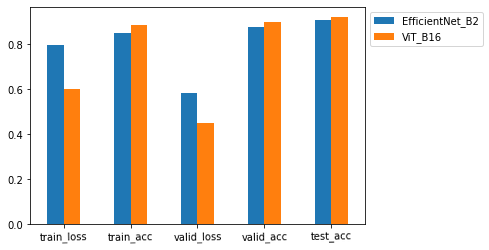

In [88]:
# plotting the results
results_df.T.plot.bar()
plt.xticks(rotation=1)
plt.legend(bbox_to_anchor=(1.0, 1.0));

- Vision Transformer Performed better than EfficientNet_B2 Model

## 6. Saving the model

In [89]:
model_save_path = "/content/ViT_B16_510_classes.pth"

torch.save(obj=vit_b16_model.state_dict(),
           f=model_save_path)

In [90]:
# copying to drive
shutil.copy2(model_save_path, "/content/drive/MyDrive/Colab Notebooks/")

'/content/drive/MyDrive/Colab Notebooks/ViT_B16_510_classes.pth'

## 7. Creating a Gradio Web app

In [92]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 

In [94]:
# making a directory for gradio web app
gradio_dir = "/content/Birds_Classification"
os.mkdir(gradio_dir)

In [96]:
# saving the class names to a txt file
with open("/content/Birds_Classification/class_names.txt", "w") as f:
  for class_name in class_names:
    f.write(class_name + "\n")

In [109]:
# copying the model to the app folder
shutil.copy2("/content/ViT_B16_510_classes.pth", "/content/Birds_Classification/")
print("copied")

copied


In [111]:
test_dir

'/content/Dataset/test'

In [129]:
# choosing 5 random images for examples
rand_imgs = []
int unique = 0
for dir in os.listdir(test_dir)[:5]:
  img = random.sample([img_list for img_list in os.listdir(test_dir + "/" + dir)], k=1)[0]
  rand_imgs.append(test_dir + "/" + dir + "/" + img + unique)
  unique+=1

# create a folder in web app
os.mkdir("/content/Birds_Classification/examples")

# copying the images to web app folder
for img in rand_imgs:
  shutil.copy2(img, "/content/Birds_Classification/examples")

print("copied")

copied


### 7.1. Creating files that helps in loading and predicting an image

In [97]:
%%writefile /content/Birds_Classification/model.py

import torch
import torchvision

from torch import nn

def create_vit_b16(num_classes: int):
  """
  Creates a ViT model and return the model with its transforms
  """

  vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

  vit_b16_model = torchvision.models.vit_b_16(weights=vit_weights)

  vit_transforms = vit_weights.transforms()

  # freeze all the layers
  for param in vit_b16_model.parameters():
    param.requires_grad = False
  
  # changing the head
  vit_b16_model.heads = nn.Sequential(
      nn.Linear(in_features=768, out_features=num_classes)
  )

  return vit_b16_model, vit_transforms

Writing /content/Birds_Classification/model.py


In [167]:
%%writefile /content/Birds_Classification/app.py

import torch
import torchvision

import gradio as gr
from model import create_vit_b16

# loading the classnames
class_names = []
with open("class_names.txt", "r") as f:
  for cls in f.readlines():
    class_names.append(cls[:-1])

# creating a ViT model
vit_b16_model, vit_transforms = create_vit_b16(num_classes=len(class_names))

vit_b16_model.load_state_dict(
    torch.load(
        f="ViT_B16_510_classes.pth",
        map_location=torch.device("cpu")
    )
)

# creating a predict function
def predict(img):
  """
  Makes prediction on the given image
  """

  img = vit_transforms(img).unsqueeze(dim=0)

  vit_b16_model.eval()
  with torch.inference_mode():
    pred_logits = vit_b16_model(img)
    preds = torch.softmax(pred_logits, dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class
    pred_and_prob_labels = {class_names[i]: preds[i].item() for i in range(len(class_names))}

  return pred_and_prob_labels

# creating title, description for the webpage
title = "Birds Classifier 🪶"
description = "Classifies an Image of a Bird to any one of the 510 species."

# creating examples list
examples_list = [["examples/" + img] for img in os.listdir("examples")]

# Building a gradio app
bird_classification = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3, label="Prediction"),
    examples = examples_list,
    title=title,
    description=description
)

# launching the web app
bird_classification.launch()

Overwriting /content/Birds_Classification/app.py


### 7.2. Creating Requirements file

In [133]:
torch.__version__

'1.13.1+cu116'

In [134]:
torchvision.__version__

'0.14.1+cu116'

In [136]:
gr.__version__

'3.23.0'

In [137]:
%%writefile /content/Birds_Classification/requirements.txt
torch==1.13.1
torchvision==0.14.1
gradio==3.23.0

Writing /content/Birds_Classification/requirements.txt


In [168]:
# zipping the web app folder for deployment
!zip -r Birds_Classification.zip Birds_Classification/ -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

  adding: Birds_Classification/ (stored 0%)
  adding: Birds_Classification/requirements.txt (deflated 4%)
  adding: Birds_Classification/examples/ (stored 0%)
  adding: Birds_Classification/examples/2.jpg (deflated 1%)
  adding: Birds_Classification/examples/1.jpg (deflated 1%)
  adding: Birds_Classification/examples/5.jpg (deflated 1%)
  adding: Birds_Classification/examples/3.jpg (deflated 1%)
  adding: Birds_Classification/class_names.txt (deflated 58%)
  adding: Birds_Classification/ViT_B16_510_classes.pth (deflated 7%)
  adding: Birds_Classification/model.py (deflated 49%)
  adding: Birds_Classification/app.py (deflated 53%)


In [169]:
# copying the zip to drive
shutil.copy2("/content/Birds_Classification.zip", "/content/drive/MyDrive/Colab Notebooks")

'/content/drive/MyDrive/Colab Notebooks/Birds_Classification.zip'

- The model is deployed in Hugging Face Spaces
- Here's the [Link to the Website](https://huggingface.co/spaces/Kathir0011/Birds_Classification)

In [177]:
# Embedding the webpage to colab
from IPython.display import IFrame

IFrame(src="https://kathir0011-birds-classification.hf.space", width=800, height=600)